# Committee Test

Testing out `crowdastro.classifier.RGZCommittee` and `crowdastro.plot.plot_classifications_row`.

In [11]:
import logging
import sys

import h5py
import matplotlib.pyplot as plt
import numpy

sys.path.insert(1, '..')
from crowdastro.classifier import RGZCommittee
from crowdastro.plot import plot_classifications_row

CROWDASTRO_H5_PATH = '../data/crowdastro.h5'
TRAINING_H5_PATH = '../data/training.h5'
N_ASTRO = 5  # SWIRE/WISE survey dependent

logging.root.setLevel(logging.DEBUG)

%matplotlib inline

In [17]:
with h5py.File(CROWDASTRO_H5_PATH, 'r') as f_h5, h5py.File(TRAINING_H5_PATH, 'r') as g_h5:
    committee = RGZCommittee(10, f_h5['/wise/cdfs/numeric'], N_ASTRO, 0.2)
    classifications = committee.k_fold_train_and_label(5, 0.9, f_h5['/atlas/cdfs/numeric'], g_h5['labels'].value)

K:\Languages\Python35_64\lib\site-packages\astropy\io\fits\util.py:578: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '
K:\Languages\Python35_64\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
..\crowdastro\plot.py:68: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ir_coords.extend([coords] * label)  # For label multiplicity.
..\crowdastro\plot.py:68: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  ir_coords.extend([coords] * label)  # For label multiplicity.


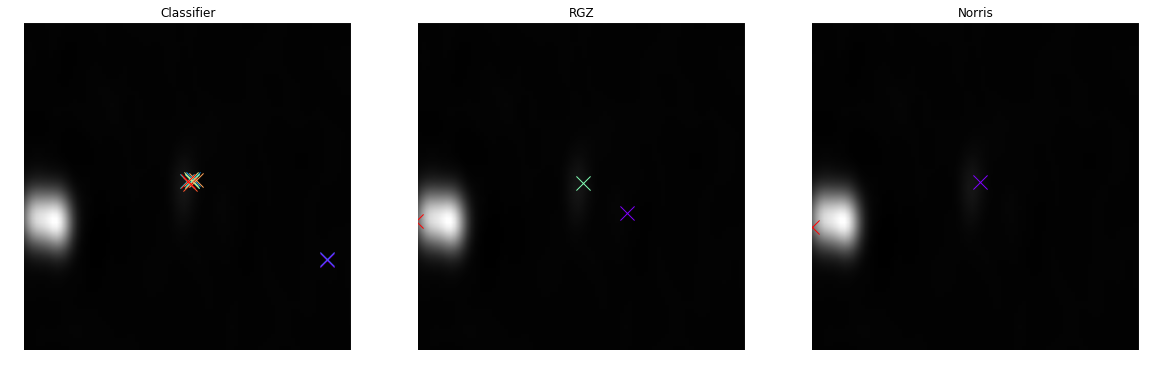

In [18]:
import importlib, crowdastro.plot
importlib.reload(crowdastro.plot)
plot_classifications_row = crowdastro.plot.plot_classifications_row

with h5py.File(CROWDASTRO_H5_PATH, 'r') as f_h5, h5py.File(TRAINING_H5_PATH, 'r') as g_h5:
    i = 250
    vec = f_h5['/atlas/cdfs/numeric'][i, :]
    mat = f_h5['/wise/cdfs/numeric']
    labels = numpy.zeros((mat.shape[0],))
    for classification in classifications[i]:
        labels[classification] += 1
        
    plt.figure(figsize=(20, 10))
    plot_classifications_row(vec, mat, labels, g_h5['labels'], f_h5['/wise/cdfs/norris_labels'], noise=True)
    plt.show()

Looks good! Now, let's take a look at how much diversity there is in those classifications.

In [19]:
def compute_agreements(classifications):
    agreements = []
    for atlas_object_classifications in classifications:
        majority = numpy.bincount(atlas_object_classifications.astype('int')).argmax()
        eq = atlas_object_classifications == majority
        agreement = eq.sum() / eq.shape[0]
        agreements.append(agreement)
    
    return numpy.array(agreements)

In [20]:
agreements = compute_agreements(classifications)

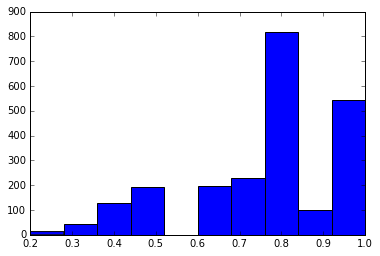

In [21]:
plt.hist(agreements)
plt.show()